# Projeto de Classificação de Solos

Este projeto tem como objetivo desenvolver e comparar diferentes modelos de aprendizado de máquina supervisionado para classificação de solos utilizando um dataset fornecido pela Hybras. O estudo do solo é de fundamental importância em muitas áreas, incluindo a agricultura, a geologia e a construção civil, uma vez que diferentes tipos de solos possuem diferentes propriedades e comportamentos.

A análise de dados do solo é uma tarefa complexa e requer um conhecimento profundo da ciência do solo. No entanto, com a aplicação de técnicas de aprendizado de máquina, podemos automatizar o processo de classificação de solos, o que poderia melhorar significativamente a eficiência e a precisão do processo.



---



Este projeto será dividido em várias etapas:


*   Limpeza dos Dados: Nesta etapa, vamos preparar nossos dados para a análise. Vamos lidar com valores ausentes, eliminar possíveis outliers, e transformar variáveis categóricas quando necessário. O objetivo é criar um dataset limpo e organizado que pode ser facilmente usado pelos modelos de aprendizado de máquina.

*   Análise Exploratória de Dados: Aqui, vamos explorar os dados em profundidade, utilizando várias técnicas estatísticas e visuais. Isso nos ajudará a entender melhor a estrutura dos nossos dados e as relações existentes entre as diferentes variáveis.

*   Construção dos Modelos de Aprendizado de Máquina: Com nossos dados preparados, vamos começar a construir nossos modelos. Vamos experimentar diferentes tipos de algoritmos de aprendizado de máquina supervisionado para a classificação de solos. Os modelos serão treinados com nossos dados, e depois testados para avaliar sua performance.

*   Comparação e Avaliação dos Modelos: Finalmente, vamos comparar a performance dos diferentes modelos. Isso será feito por meio da análise de métricas como a acurácia, a precisão e a revocação de cada modelo. Com esses resultados, poderemos escolher o modelo que melhor se ajusta às nossas necessidades.



A conclusão deste projeto nos fornecerá insights valiosos sobre como o aprendizado de máquina pode ser aplicado para melhorar a classificação de solos. Ao mesmo tempo, proporcionará uma oportunidade para comparar a eficácia de diferentes tipos de algoritmos de aprendizado supervisionado nessa tarefa.

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
df = pd.read_csv('hybras_dataset.csv')
df.head()

,Id,General_description,Detail_description,Profile_identifier,Others_identifiers,Profile id,Depth,horizon,top_depth,bot_depth,...,keywords,Textural_Method,Particle_SZ_fraction,OC_OM_Method,BD_Method,PD_Method,TP_Method,Ksat_Method,Ksat_Sample_SZ1,Ksat_Sample_SZ2
0,1,Centro Nacional de Pesquisa de Milho e Sorgo -...,NaN,NaN,NaN,1,0-10,AP,0.0,10.0,...,"membrana, panela de pressão",Embrapa (1979). Centro Nacional de Levantament...,"argila (<0.002 mm), silte (0.002 a 0.05 mm), a...",Walkley&Black (1934) com determinação por titu...,anel volumétrico,balão volumétrico,Porosidade Total=1-densidade do solo/densidade...,NaN,NaN,NaN
1,2,Centro Nacional de Pesquisa de Milho e Sorgo -...,NaN,NaN,NaN,1,10-26,A3,10.0,26.0,...,"membrana, panela de pressão",Embrapa (1979). Centro Nacional de Levantament...,"argila (<0.002 mm), silte (0.002 a 0.05 mm), a...",Walkley&Black (1934) com determinação por titu...,anel volumétrico,balão volumétrico,Porosidade Total=1-densidade do solo/densidade...,NaN,NaN,NaN
2,3,Centro Nacional de Pesquisa de Milho e Sorgo -...,NaN,NaN,NaN,1,26-49,B1,26.0,49.0,...,"membrana, panela de pressão",Embrapa (1979). Centro Nacional de Levantament...,"argila (<0.002 mm), silte (0.002 a 0.05 mm), a...",Walkley&Black (1934) com determinação por titu...,anel volumétrico,balão volumétrico,Porosidade Total=1-densidade do solo/densidade...,NaN,NaN,NaN
3,4,Centro Nacional de Pesquisa de Milho e Sorgo -...,NaN,NaN,NaN,1,49-102,B21,49.0,102.0,...,"membrana, panela de pressão",Embrapa (1979). Centro Nacional de Levantament...,"argila (<0.002 mm), silte (0.002 a 0.05 mm), a...",Walkley&Black (1934) com determinação por titu...,anel volumétrico,balão volumétrico,Porosidade Total=1-densidade do solo/densidade...,NaN,NaN,NaN
4,5,Centro Nacional de Pesquisa de Milho e Sorgo -...,NaN,NaN,NaN,1,102-142,B22,102.0,142.0,...,"membrana, panela de pressão",Embrapa (1979). Centro Nacional de Levantament...,"argila (<0.002 mm), silte (0.002 a 0.05 mm), a...",Walkley&Black (1934) com determinação por titu...,anel volumétrico,balão volumétrico,Porosidade Total=1-densidade do solo/densidade...,NaN,NaN,NaN


# Limpeza dos dados

Neste seção, primeiramente selecionamos as colunas relevantes do conjunto de dados. As colunas relevantes incluem a classificação do solo (que é nossa variável alvo) e uma lista de propriedades do solo que são nossas características preditoras.

Em seguida, preenchemos quaisquer valores faltantes no conjunto de dados com 0 usando a função fillna(). Embora essa seja uma abordagem simples, é importante verificar se essa é a melhor estratégia para o seu conjunto de dados específico. Em alguns casos, pode ser mais adequado preencher os valores faltantes com a média, mediana, ou moda, ou usar um método de imputação mais sofisticado.

Depois, obtemos uma lista dos tipos de solo únicos presentes no conjunto de dados e imprimimos esses tipos.

Finalmente, visualizamos as primeiras linhas do conjunto de dados para verificar se as alterações foram aplicadas corretamente. Isso nos dá uma visão geral do conjunto de dados após a limpeza inicial dos dados.

In [ ]:
soil_properties_columns = ["clay (%)", "silt (%)", "sand (%)", "vf_sand (%)", "f_sand (%)", "m_sand (%)",
           "c_sand (%)", "vc_sand (%)", "ksat (cm/d)", "satwat (cm3/cm3)", "bulk_den (g/cm3)",
           "particle_den (g/cm3)", "porosity (cm3/cm3)", "org_carb (%)", "org_mat (%)"]
soil_classification_column = 'BR_Soil Classification'

df = df[[soil_classification_column] + soil_properties_columns]
df = df.fillna(0)

soil_types = df['BR_Soil Classification'].unique()
print(soil_types)
df.head()

['Latossolo' 'Argissolo' 'Nitossolo' 'Neossolo Regossólico' 'Gleissolo'
 'Cambissolo' 'Organossolo' 'Espodossolo' 'Neossolo Flúvico' 'Planossolo'
 'Chernossolo']


,BR_Soil Classification,clay (%),silt (%),sand (%),vf_sand (%),f_sand (%),m_sand (%),c_sand (%),vc_sand (%),ksat (cm/d),satwat (cm3/cm3),bulk_den (g/cm3),particle_den (g/cm3),porosity (cm3/cm3),org_carb (%),org_mat (%)
0,Latossolo,53.0,39.0,8.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.87,2.56,0.658,2.44,4.20
1,Latossolo,68.0,24.0,8.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,1.08,2.56,0.579,1.97,3.40
2,Latossolo,73.0,18.0,9.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.95,2.53,0.623,1.79,3.09
3,Latossolo,73.0,18.0,9.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.89,2.55,0.650,1.40,2.41
4,Latossolo,75.0,16.0,9.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.85,2.62,0.673,1.32,2.28


## Explicação de cada coluna do dataset

* BR_Soil Classification: Classificação do solo de acordo com a Empresa Brasileira de Pesquisa Agropecuária (EMBRAPA).
* clay (%): Porcentagem de argila no solo.
* silt (%): Porcentagem de silte no solo.
* sand (%): Porcentagem de areia no solo.
* vf_sand (%): Porcentagem de areia muito fina.
* f_sand (%): Porcentagem de areia fina.
* m_sand (%): Porcentagem de areia média.
* c_sand (%): Porcentagem de areia grossa.
* vc_sand (%): Porcentagem de areia muito grossa.
* ksat (cm/d): Taxa de saturação hidráulica do solo.
* satwat (cm3/cm3): Volume de água que o solo pode reter quando saturado.
* bulk_den (g/cm3): Densidade bruta do solo.
* particle_den (g/cm3): Densidade das partículas do solo.
* porosity (cm3/cm3): Volume de poros no solo.
* org_carb (%): Porcentagem de carbono orgânico no solo.
* org_mat (%): Porcentagem de matéria orgânica no solo.

# Exploração dos dados iniciais

Nesta seção, conduzimos uma análise exploratória inicial dos dados. Isso envolve entender a estrutura geral do conjunto de dados, como o número de colunas e linhas, os tipos de dados de cada coluna, a existência de valores faltantes, entre outras informações.

Podemos também visualizar as primeiras linhas do conjunto de dados para ter uma ideia do formato e do conteúdo dos dados. Além disso, podemos gerar estatísticas descritivas para cada coluna, como a média, o desvio padrão, os valores mínimo e máximo, e outros.

Isso nos ajuda a ter uma visão inicial dos dados com os quais estamos trabalhando e nos permite planejar as etapas subsequentes de pré-processamento de dados, como limpeza de dados, transformação de dados e seleção de recursos.

In [ ]:
print('Dimensões do DataFrame', df.shape)

df.describe()

Dimensões do DataFrame (1075, 16)


,clay (%),silt (%),sand (%),vf_sand (%),f_sand (%),m_sand (%),c_sand (%),vc_sand (%),ksat (cm/d),satwat (cm3/cm3),bulk_den (g/cm3),particle_den (g/cm3),porosity (cm3/cm3),org_carb (%),org_mat (%)
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.00000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000
mean,36.534363,21.908172,41.557465,1.173591,8.48846,2.983609,6.255214,0.384047,85.723293,0.357684,1.389045,2.396447,0.426362,0.961809,1.589145
std,20.174220,13.816578,21.591565,2.888269,14.88980,7.781236,12.713708,1.576452,265.609282,0.233933,0.267087,0.709924,0.161666,1.570091,2.669052
min,0.000000,0.000000,0.400000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,0.000000,0.000000
25%,16.910000,10.000000,25.150000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.210000,2.480000,0.358000,0.000000,0.000000
50%,36.000000,18.800000,43.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.419000,1.440000,2.570000,0.432000,0.630000,1.120000
75%,50.275000,35.760000,52.660000,0.000000,13.61250,0.000000,5.465000,0.000000,54.850000,0.544500,1.590000,2.670000,0.529500,1.220000,2.050000
max,96.000000,63.640000,97.990000,16.440000,95.89000,48.320000,67.000000,15.340000,3890.000000,0.866000,2.010000,3.670000,0.866000,23.400000,40.300000


## Correlação entre as propriedades do solo

Nesta seção, vamos calcular e visualizar a correlação entre as diferentes propriedades do solo. Isso nos ajudará a entender como essas propriedades estão relacionadas umas com as outras e pode revelar relações importantes que poderiam informar nosso processo de modelagem.

In [ ]:
cor_data = (df.corr().stack()
              .reset_index()
              .rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'}))
cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)

<ipython-input-100-c22cba5ac0d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_data = (df.corr().stack()


In [ ]:
base = alt.Chart(cor_data).encode(
    x='variable2:O',
    y='variable:O'
)

text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(
    width=800,
    height=600
)

cor_plot + text

alt.LayerChart(...)

## Histogramas das propriedades do solo

Vamos criar histogramas para cada propriedade do solo. Isso nos permitirá visualizar a distribuição de cada propriedade e identificar padrões ou outliers.

In [ ]:
for column in soil_properties_columns:
  chart = alt.Chart(df).mark_bar().encode(x = column, y = 'count()')
  chart.display()

Output hidden; open in https://colab.research.google.com to view.

## Normalizando dados númericos

Aqui, vamos normalizar os dados numéricos para garantir que eles estejam em uma escala comparável. Isso é especialmente importante para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

In [ ]:
numeric_values = df[soil_properties_columns]
numeric_values=(numeric_values - numeric_values.min()) / (numeric_values.max() - numeric_values.min())
df[soil_properties_columns] = numeric_values

## Variação das médias das propriedades quimícas e físicas

Nesta seção, vamos analisar a variação das médias das propriedades químicas e físicas dos solos. Isso pode nos ajudar a entender como essas propriedades variam entre diferentes tipos de solos.

In [ ]:
df_mean_ft = df.groupby(['BR_Soil Classification'])[soil_properties_columns].mean()
df_mean_ft

,clay (%),silt (%),sand (%),vf_sand (%),f_sand (%),m_sand (%),c_sand (%),vc_sand (%),ksat (cm/d),satwat (cm3/cm3),bulk_den (g/cm3),particle_den (g/cm3),porosity (cm3/cm3),org_carb (%),org_mat (%)
BR_Soil Classification,,,,,,,,,,,,,,,
Argissolo,0.312769,0.229606,0.563194,0.150179,0.181365,0.143477,0.275266,0.064727,0.032356,0.202985,0.711415,0.636038,0.431053,0.030470,0.027219
Cambissolo,0.449879,0.367916,0.338123,0.057116,0.070490,0.035380,0.052267,0.121743,0.043130,0.647806,0.514137,0.656241,0.598688,0.050432,0.049295
Chernossolo,0.337240,0.507001,0.358228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.522682,0.652857,0.713410,0.535013,0.000000,0.058862
Espodossolo,0.059206,0.032900,0.940901,0.136671,0.868195,0.082393,0.013722,0.118889,0.036716,0.550808,0.660357,0.700443,0.521002,0.000000,0.094516
Gleissolo,0.290996,0.468617,0.428749,0.062934,0.044841,0.093137,0.011791,0.000143,0.010651,0.579592,0.587944,0.669004,0.558751,0.090930,0.087849
Latossolo,0.522873,0.211506,0.368316,0.070171,0.084030,0.063377,0.101823,0.007948,0.034241,0.344794,0.589362,0.637579,0.519279,0.020356,0.030506
Neossolo Flúvico,0.195833,0.313482,0.623527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.496536,0.688571,0.000000,0.000000,0.000000,0.031017
Neossolo Regossólico,0.168125,0.139587,0.764183,0.962388,0.438523,0.309154,0.029925,0.010539,0.000000,0.398191,0.743810,0.706630,0.459777,0.027365,0.000000
Nitossolo,0.513624,0.495637,0.192128,0.031292,0.021880,0.005933,0.015864,0.001726,0.000194,0.626326,0.591693,0.657962,0.542340,0.089536,0.009432


<ipython-input-105-59b64e94c8b2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


[Text(0, 0, 'Argissolo'),
 Text(1, 0, 'Cambissolo'),
 Text(2, 0, 'Chernossolo'),
 Text(3, 0, 'Espodossolo'),
 Text(4, 0, 'Gleissolo'),
 Text(5, 0, 'Latossolo'),
 Text(6, 0, 'Neossolo Flúvico'),
 Text(7, 0, 'Neossolo Regossólico'),
 Text(8, 0, 'Nitossolo'),
 Text(9, 0, 'Organossolo'),
 Text(10, 0, 'Planossolo')]

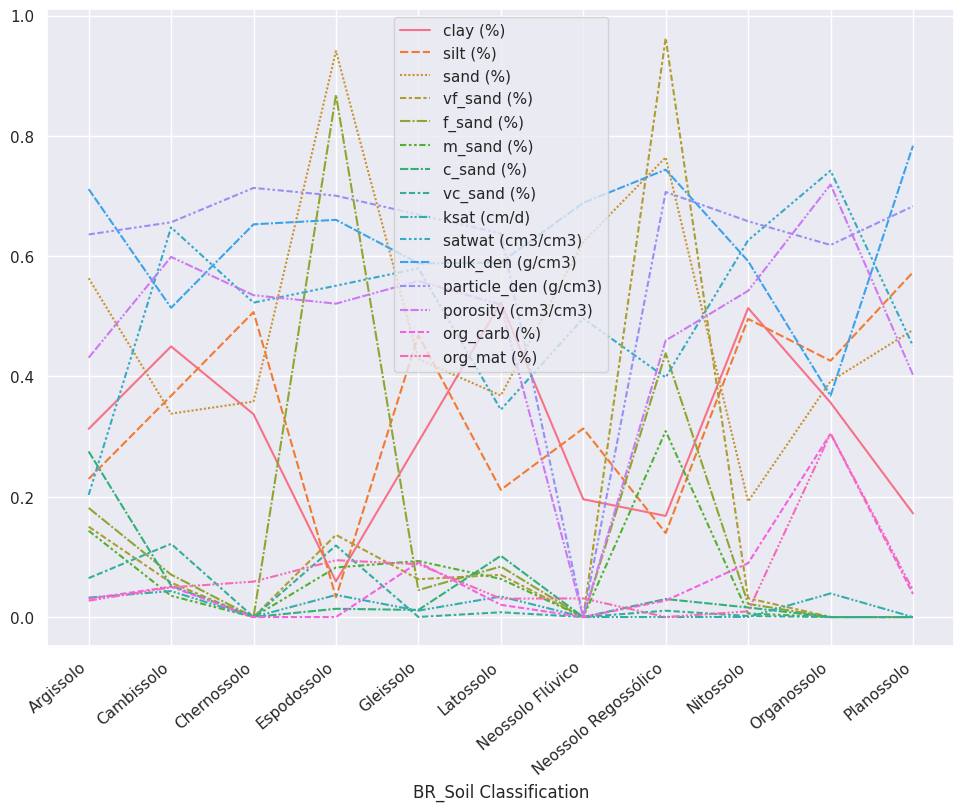

In [ ]:
ax = sns.lineplot(data=df_mean_ft, sort=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## Popularidade dos tipos de solo

Aqui, vamos explorar a popularidade ou a frequência dos diferentes tipos de solos em nosso dataset.

In [ ]:
df['BR_Soil Classification'].value_counts()

Latossolo               355
Argissolo               209
Planossolo              192
Nitossolo               108
Gleissolo                82
Cambissolo               69
Chernossolo              28
Espodossolo              16
Organossolo               8
Neossolo Regossólico      6
Neossolo Flúvico          2
Name: BR_Soil Classification, dtype: int64

## Frequência

<Axes: >

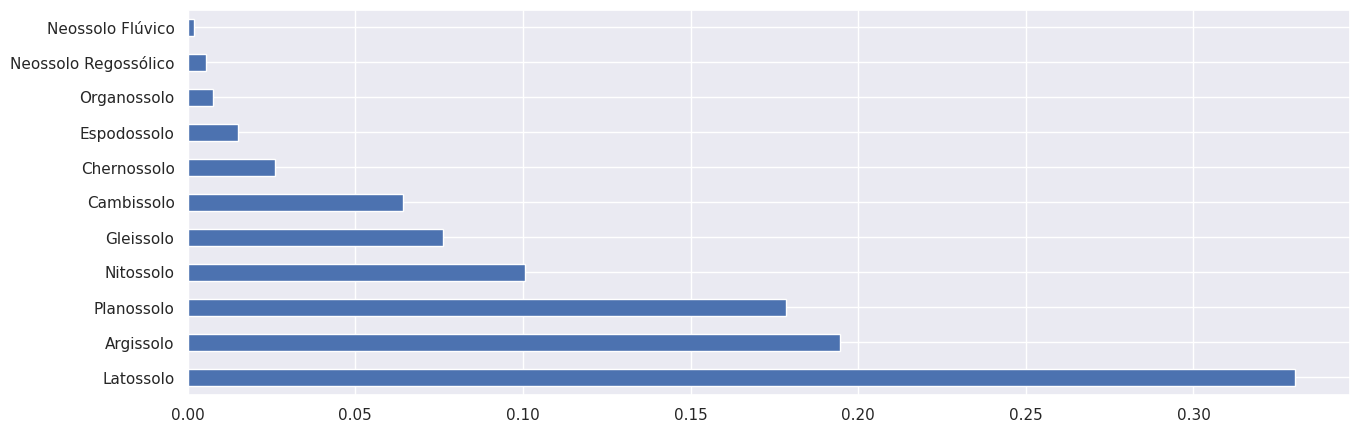

In [ ]:
(df['BR_Soil Classification'].value_counts(normalize=True).plot.barh(figsize=(15, 5)))

## Solos e características

Nesta seção, vamos criar boxplots para cada propriedade do solo por tipo de solo. Isso nos permitirá ver a variação de cada propriedade dentro de cada tipo de solo e identificar quais propriedades são mais importantes para a classificação do solo.

In [ ]:
for column in soil_properties_columns:
  chart = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('BR_Soil Classification'),
    y=alt.Y(column)
  ).properties(
    width=650,
    height=400
  )
  chart.display()

Output hidden; open in https://colab.research.google.com to view.

## Alterando dados não numéricos

Nesta seção, vamos transformar as colunas não numéricas do nosso dataset usando o LabelEncoder. Isso é necessário porque muitos algoritmos de aprendizado de máquina requerem que os dados de entrada sejam numéricos.

In [ ]:
objects = df.select_dtypes(include="object").columns

le = preprocessing.LabelEncoder()

for object_value in objects:
    df[object_value] = le.fit_transform(df[object_value].astype(str))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BR_Soil Classification  1075 non-null   int64  
 1   clay (%)                1075 non-null   float64
 2   silt (%)                1075 non-null   float64
 3   sand (%)                1075 non-null   float64
 4   vf_sand (%)             1075 non-null   float64
 5   f_sand (%)              1075 non-null   float64
 6   m_sand (%)              1075 non-null   float64
 7   c_sand (%)              1075 non-null   float64
 8   vc_sand (%)             1075 non-null   float64
 9   ksat (cm/d)             1075 non-null   float64
 10  satwat (cm3/cm3)        1075 non-null   float64
 11  bulk_den (g/cm3)        1075 non-null   float64
 12  particle_den (g/cm3)    1075 non-null   float64
 13  porosity (cm3/cm3)      1075 non-null   float64
 14  org_carb (%)            1075 non-null   

## Avaliação dos Algoritmos de Classificação

Esta é a etapa final do projeto, onde aplicamos e avaliamos uma variedade de algoritmos de aprendizado de máquina supervisionado para classificar os solos.

Utilizamos a técnica de validação cruzada estratificada (Stratified K-Fold) com um número de divisões definido na variável K_FOLD_NUMBER_OF_SPLITS. Essa técnica é útil para garantir que cada divisão do conjunto de dados mantém a proporção original das classes alvo.

Nossa função evaluate_classifier recebe um classificador e o conjunto de dados como entrada. Ela divide o conjunto de dados em dados de treino e teste, ajusta o classificador com os dados de treino e faz previsões com os dados de teste. Calculamos a precisão dessas previsões em comparação com os rótulos reais de teste. A média da precisão de todas as divisões K-Fold é calculada para fornecer uma estimativa mais robusta do desempenho do classificador.

A variável y representa nossa variável alvo (a classificação de solos), e x representa nossas variáveis preditoras (as propriedades do solo).

Vários algoritmos de classificação são testados, incluindo K-Nearest Neighbors, Support Vector Machines (SVM) com diferentes kernels, Decision Tree, Random Forest, Neural Net, AdaBoost e Naive Bayes. Para cada algoritmo, a precisão é calculada e impressa, permitindo a comparação do desempenho dos diferentes algoritmos.

In [ ]:
K_FOLD_NUMBER_OF_SPLITS = 2

In [ ]:
def evaluate_classifier(clf, x, y):
  kfold = StratifiedKFold(n_splits=K_FOLD_NUMBER_OF_SPLITS, shuffle=True, random_state=11)
  splits = kfold.split(x, y)
  precision = 0
  for n,(training_index,test_index) in enumerate(splits):
    training_data = x.iloc[training_index]
    training_labels = y.iloc[training_index]
    test_data = x.iloc[test_index]
    test_labels = y.iloc[test_index]

    clf.fit(training_data, training_labels)
    prediction = clf.predict(test_data)
    precision += precision_score(test_labels, prediction, average='macro', labels=np.unique(prediction))
  return precision/K_FOLD_NUMBER_OF_SPLITS

In [ ]:
y = df['BR_Soil Classification']
x = df.drop(columns=['BR_Soil Classification'])

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]

has_feature_importance = [
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
]

In [ ]:
precisions = []
feature_importances_list = []

for name, clf in zip(names, classifiers):
  clf_precision = evaluate_classifier(clf, x, y)
  precisions.append(clf_precision)
  if (name in has_feature_importance):
    feature_importances = clf.feature_importances_
    features_df = pd.DataFrame({
        'Features': x.columns,
        'Importance': feature_importances
    })
    features_df.sort_values(by='Importance', ascending=False, inplace=True)
    feature_importances_list.append(features_df)

## Precisão dos algoritmos

In [ ]:
for index, clf_precision in enumerate(precisions):
  print('Algorithm: ', names[index], ' | Precision: ', clf_precision)

Algorithm:  Nearest Neighbors  | Precision:  0.7965388905810764
Algorithm:  Linear SVM  | Precision:  0.3302319785674233
Algorithm:  RBF SVM  | Precision:  0.8117193689973485
Algorithm:  Decision Tree  | Precision:  0.7664305017413962
Algorithm:  Random Forest  | Precision:  0.8152660937402417
Algorithm:  Neural Net  | Precision:  0.653046887334197
Algorithm:  AdaBoost  | Precision:  0.6662710911876326
Algorithm:  Naive Bayes  | Precision:  0.5539073208452383


## Importância das features

In [ ]:
for index, feature_df in enumerate(feature_importances_list):
  print('Algorithm: ', has_feature_importance[index])
  print('\n', feature_df, '\n')

Algorithm:  Decision Tree

                 Features  Importance
1               silt (%)    0.247053
14           org_mat (%)    0.155388
2               sand (%)    0.143705
0               clay (%)    0.109709
13          org_carb (%)    0.098027
6             c_sand (%)    0.067673
9       satwat (cm3/cm3)    0.056380
11  particle_den (g/cm3)    0.042654
4             f_sand (%)    0.037529
12    porosity (cm3/cm3)    0.013856
3            vf_sand (%)    0.012718
10      bulk_den (g/cm3)    0.009003
7            vc_sand (%)    0.006306
5             m_sand (%)    0.000000
8            ksat (cm/d)    0.000000 

Algorithm:  Random Forest

                 Features  Importance
1               silt (%)    0.152577
2               sand (%)    0.142523
4             f_sand (%)    0.110040
14           org_mat (%)    0.088957
10      bulk_den (g/cm3)    0.084955
11  particle_den (g/cm3)    0.083309
13          org_carb (%)    0.058926
9       satwat (cm3/cm3)    0.057395
6             c_s

## É possível prever o tipo de solo brasileiro com base em suas propriedades físicas e químicas?

Sim, de acordo com os resultados apresentados, é possível prever o tipo de solo brasileiro com base em suas propriedades físicas e químicas. Algoritmos como Nearest Neighbors, RBF SVM e Random Forest apresentaram uma boa precisão, indicando que eles são capazes de classificar corretamente os tipos de solo a partir das propriedades fornecidas.

## Quais são as características físicas e químicas que mais influenciam na classificação do tipo de solo?

Com base na análise das importâncias das características obtidas para cada algoritmo, podemos identificar as características físicas e químicas que possuem a maior influência na classificação dos tipos de solo. Aqui estão os resultados para cada algoritmo:

**Árvore de Decisão:**
As características com maior importância são:
1. silt (%) - silte (%)
2. org_mat (%) - matéria orgânica (%)
3. org_carb (%) - carbono orgânico total (%)
4. clay (%) - argila (%)
5. sand (%) - areia (%)

**Floresta Aleatória:**
As características com maior importância são:
1. silt (%) - silte (%)
2. bulk_den (g/cm3) - densidade do solo (g/cm3)
3. satwat (cm3/cm3) - água saturada (%)
4. f_sand (%) - areia fina (%)
5. c_sand (%) - areia grossa (%)

**AdaBoost:**
As características com maior importância são:
1. vf_sand (%) - areia muito fina (%)
2. f_sand (%) - areia fina (%)

Esses resultados indicam que as características físicas e químicas que mais influenciam na classificação do tipo de solo podem variar entre os algoritmos. No entanto, de forma geral, as características relacionadas à distribuição granulométrica do solo, como os percentuais de silte, argila, areia e suas frações específicas (como areia fina e areia muito fina), parecem desempenhar um papel importante na classificação. Além disso, características relacionadas à densidade (bulk_den) e ao conteúdo de matéria orgânica (org_mat, org_carb) também são relevantes em alguns algoritmos.

É importante lembrar que a importância das características pode variar dependendo do conjunto de dados específico e do algoritmo utilizado. Portanto, esses resultados devem ser interpretados dentro do contexto deste projeto específico.
